## Other Variables - General EDA 

While the other variables aren't directly involved in the problem statement, it is still important to carry out proper EDA to gain insight into how they collectively affect the price of used cars.

This generates a SweetViz report of the dataset. While it can do much of the basic EDA for each variable, in particular, it also does a Pearson correlation matrix for the categorical variables, allowing us to understand how much they directly affect the price variable.

In [15]:
# Please refer to the HTML report under the EDA folder

report = sweetviz.analyze(carData, target_feat="price")  
report.show_html('EDA/report.html')

Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:00 -> (00:00 left)


Report EDA/report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


The following code blocks prints a bar graph representing the number of times each unique value appears for each variable. 

In [16]:
def unique_counts_graph (dataset, variable):
    #prints a bar graph representing the number of value_counts for each value of a variable
    plt.figure(figsize=(18,10))
    ax = dataset[variable].value_counts().plot(kind='bar')
    ax.set_title("Number of unique values of '{}'".format(variable))

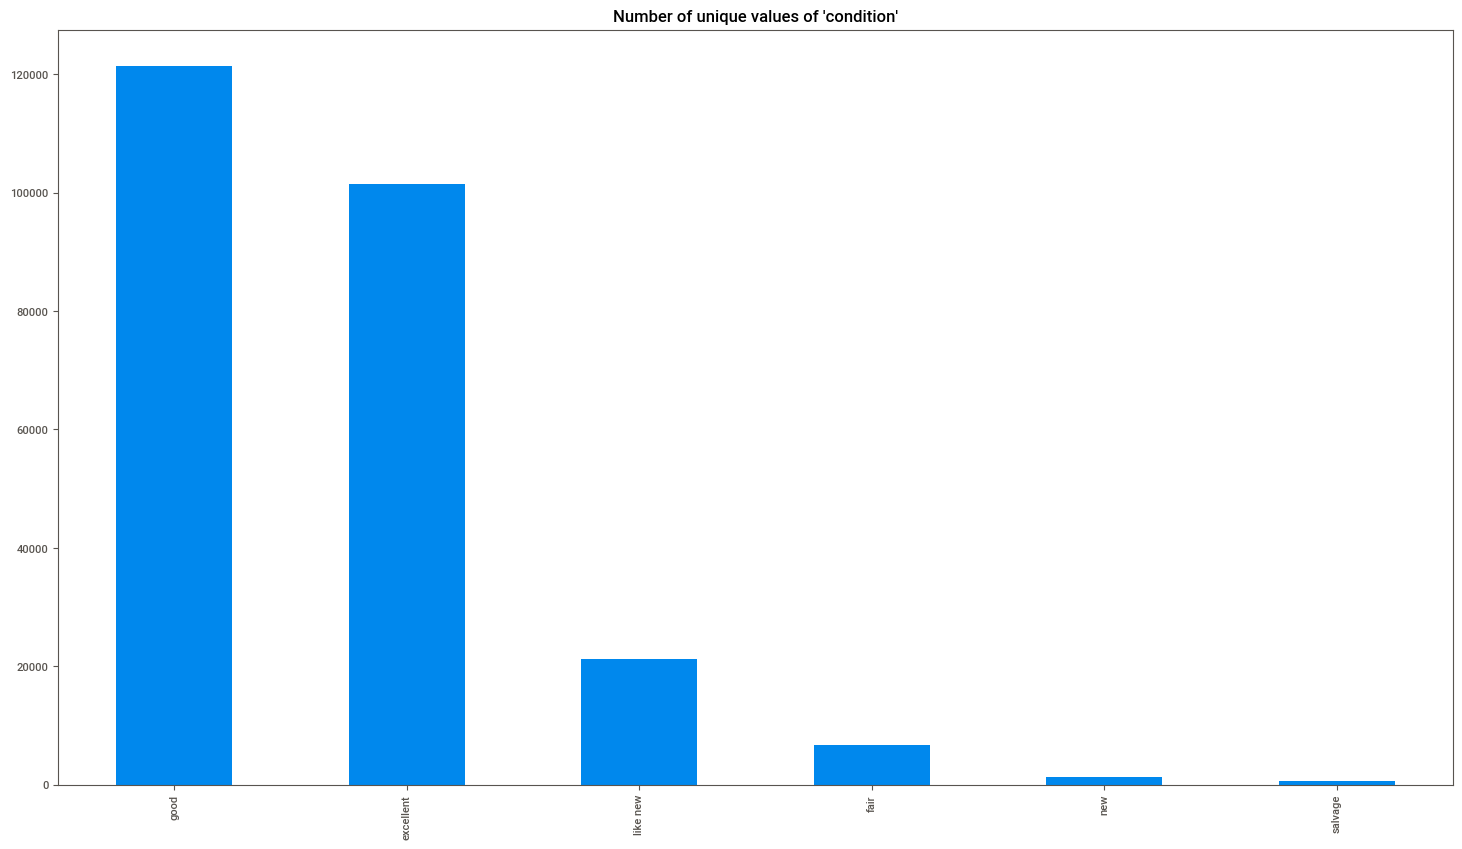

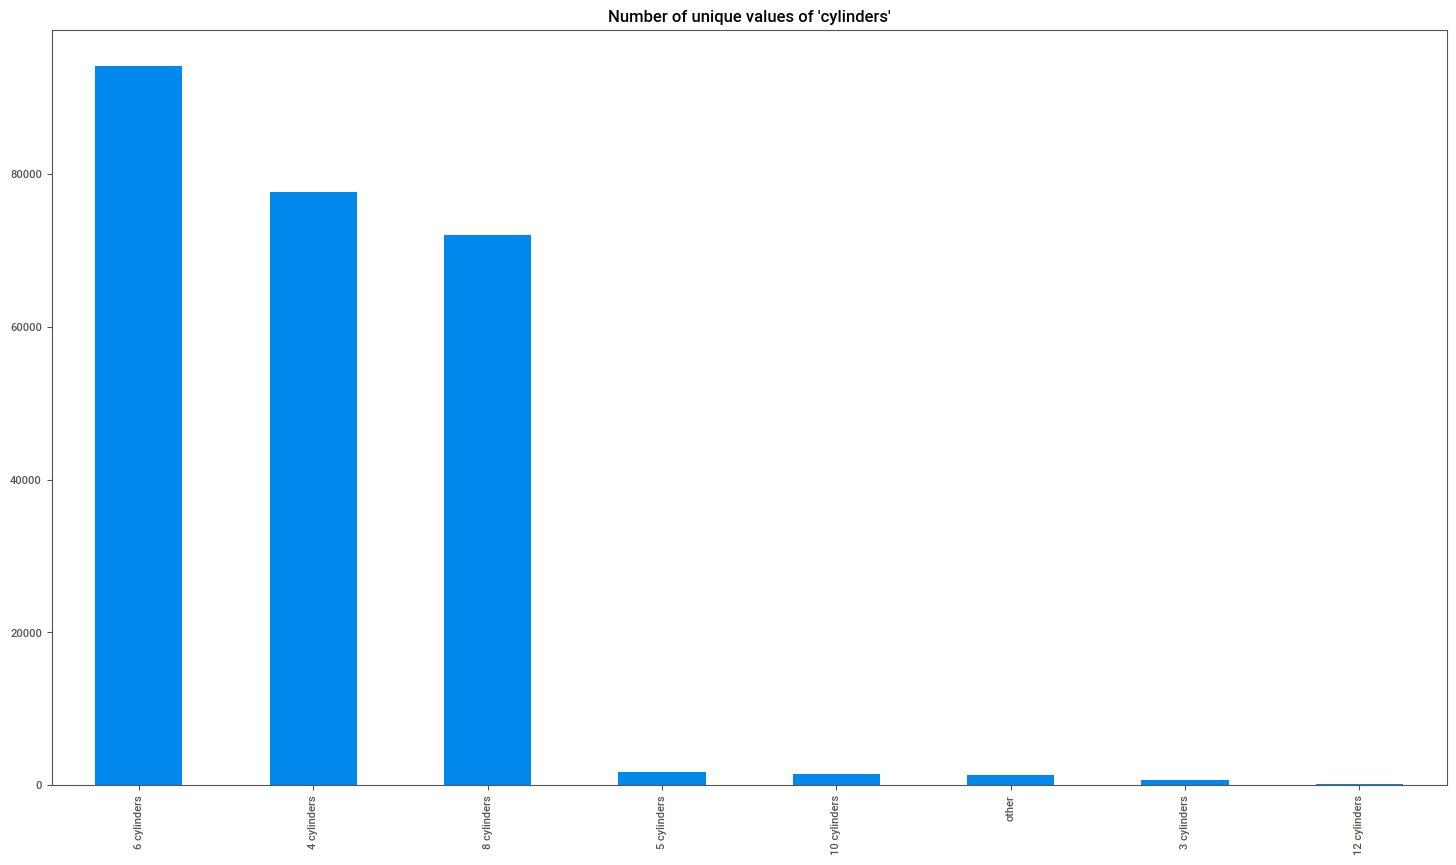

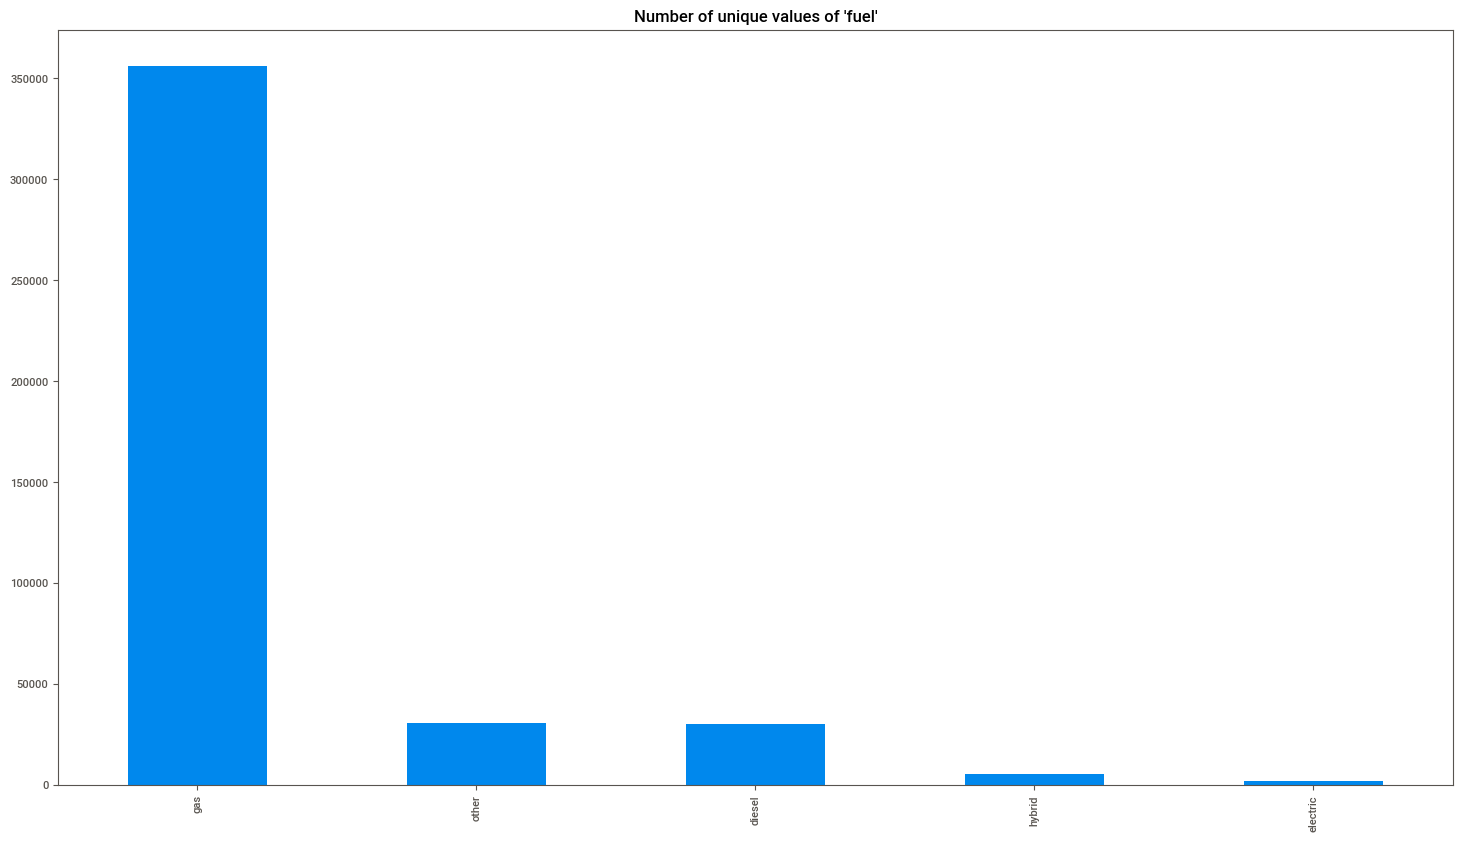

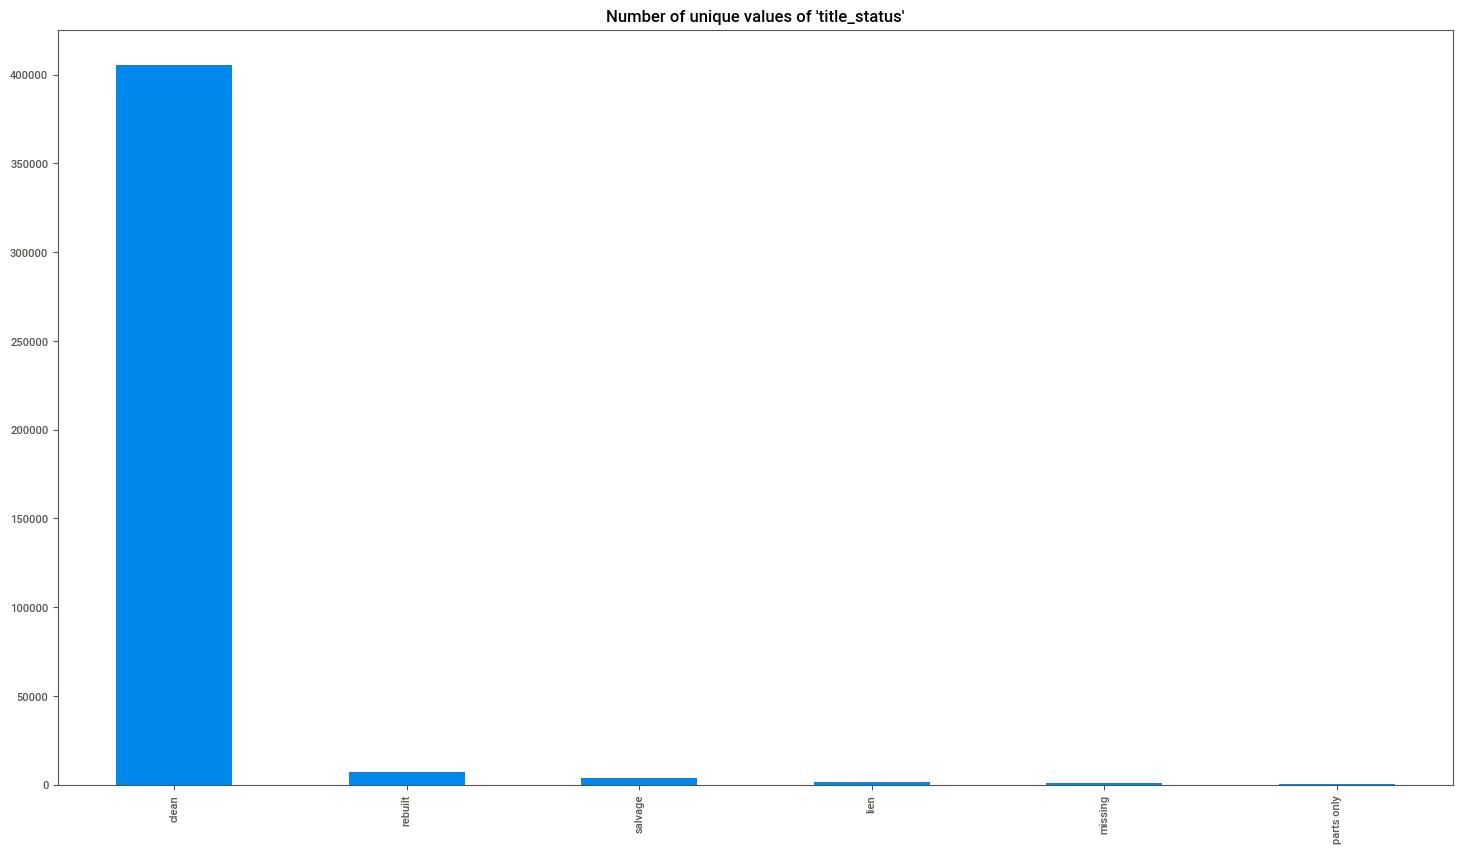

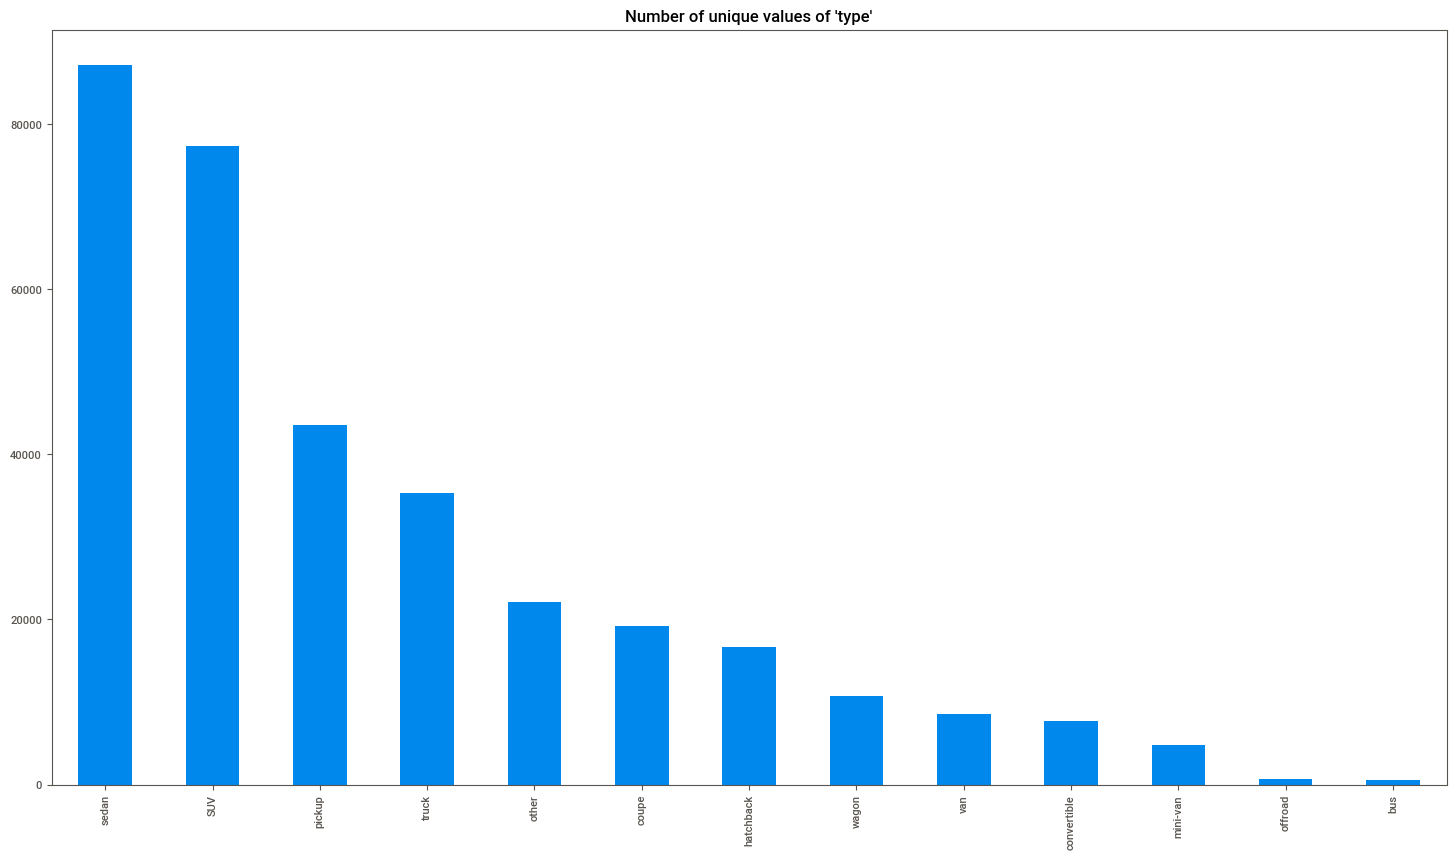

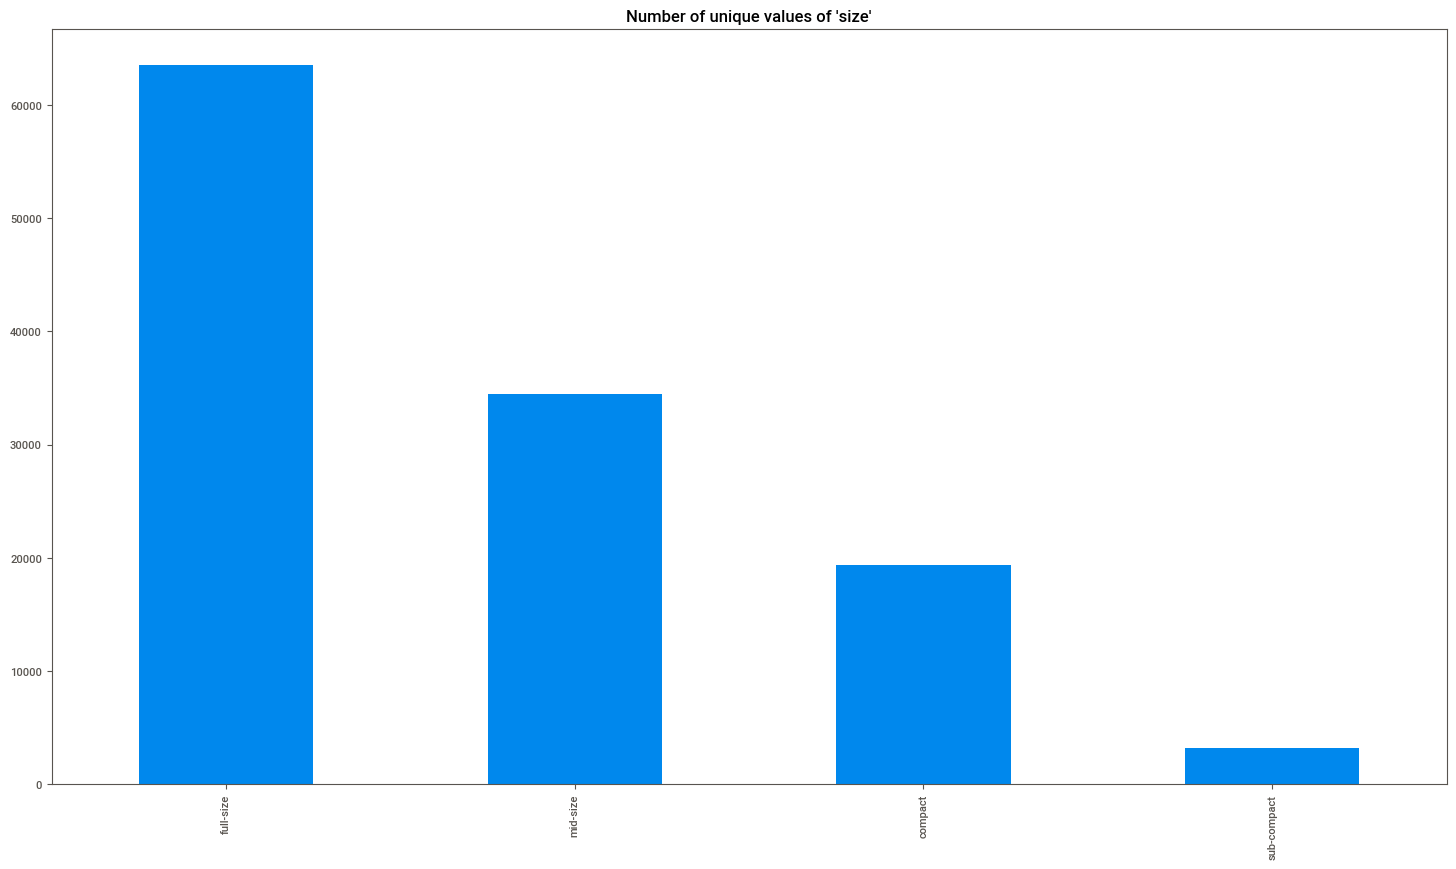

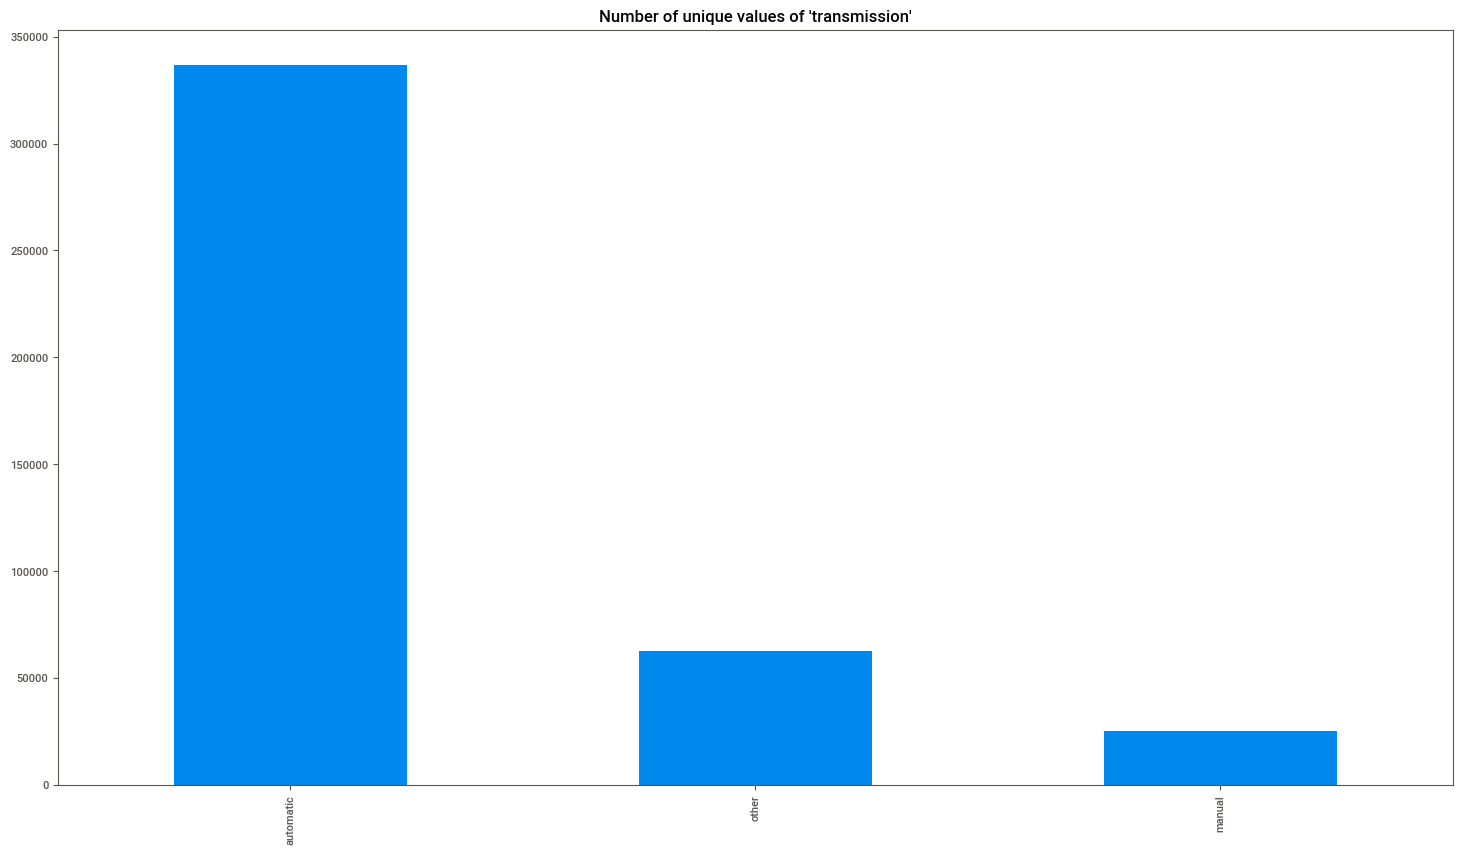

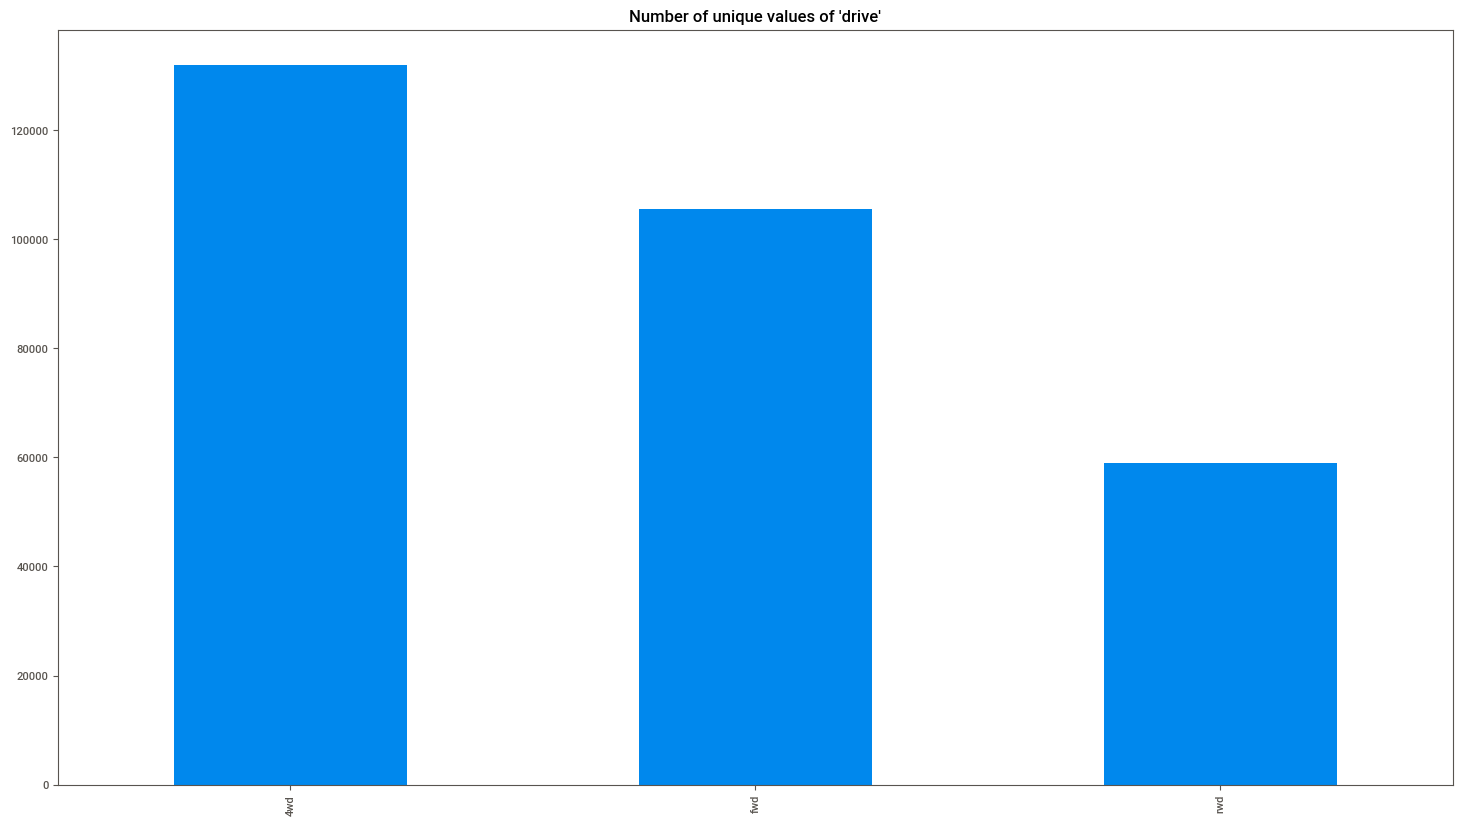

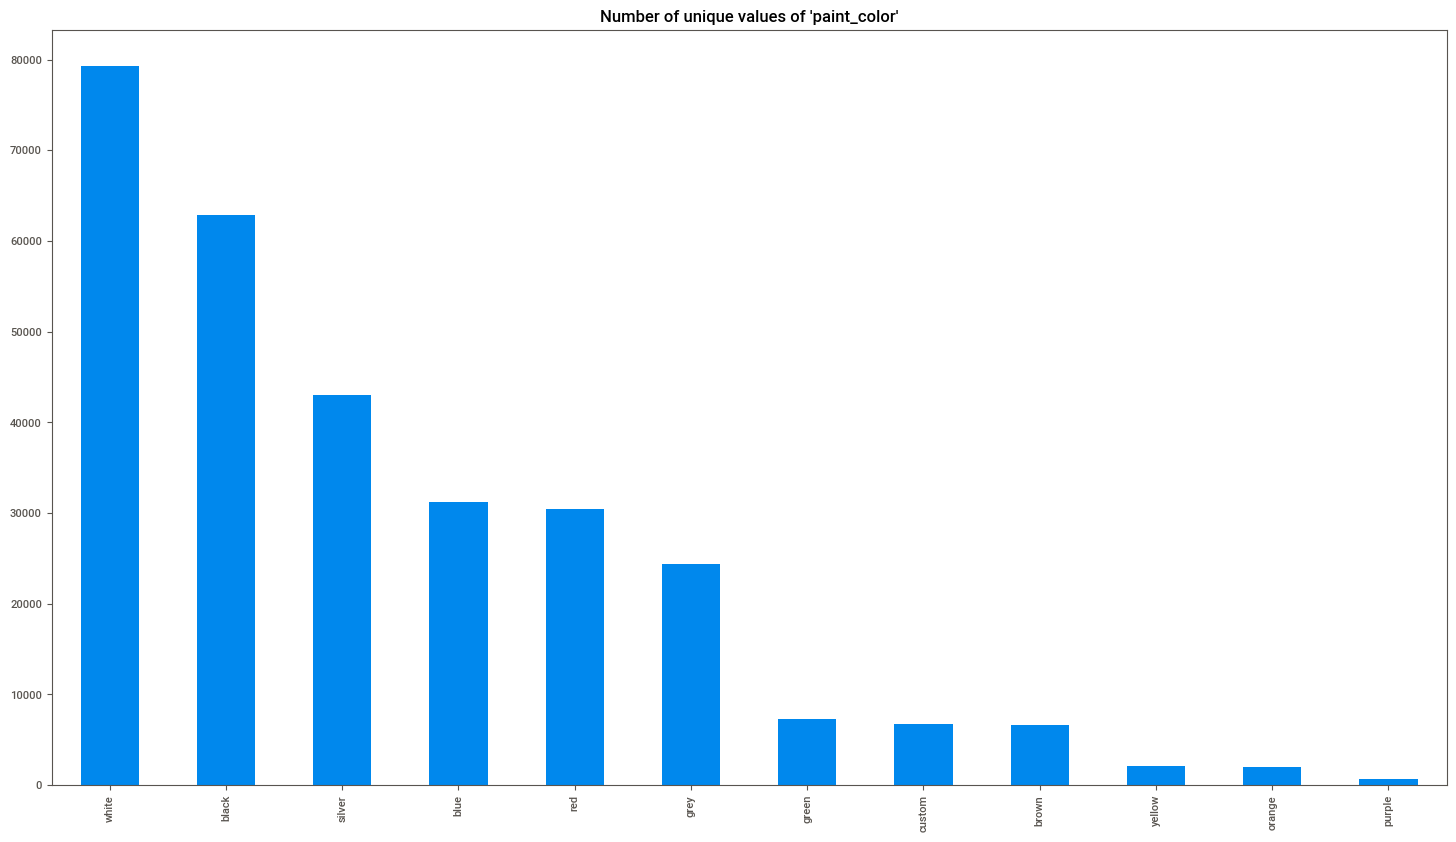

In [17]:
variable_list = ["condition", "cylinders", "fuel", "title_status", "type", "size", "transmission", "drive", "paint_color"]
for i in range(len(variable_list)):
    unique_counts_graph(carData, variable_list[i])

The following code block generates box plots for different variables, showing the price distribution for each unqiue value. Only variables with a limited number of unique values have been chosen to create a graph that is readable and provides usefulness. 

In [18]:
def box_plot_generation (dataset, variable):
    df = dataset[['price', variable]]
    df[variable] = df[variable].astype('category')
    priceq1 = df.quantile(q=0.25)[0]
    priceq3 = df.quantile(q=0.75)[0]
    iqf = priceq3-priceq1
    upperlimit = priceq3 + 1.5*iqf
    lowerlimit = priceq1 - 1.5*iqf
    f = plt.figure(figsize=(16, 8))
    f = sb.boxplot(x = variable, y = 'price', data = df)
    f.set_ylim(0, upperlimit*3)

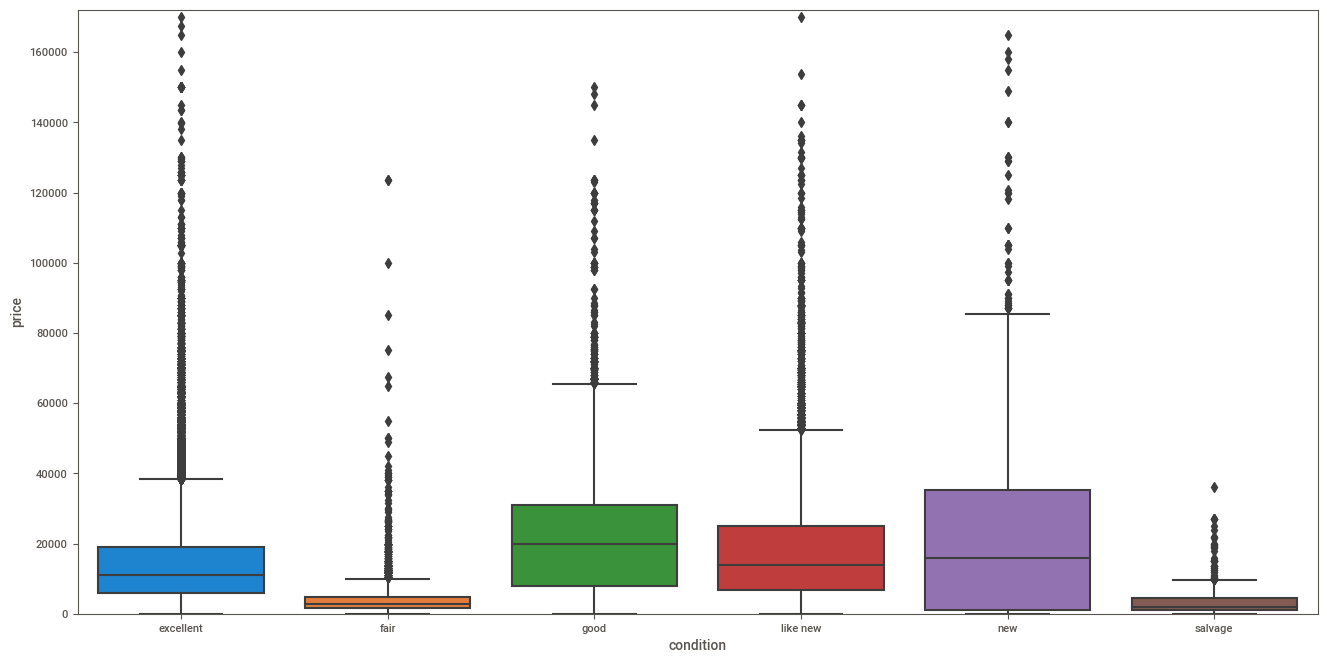

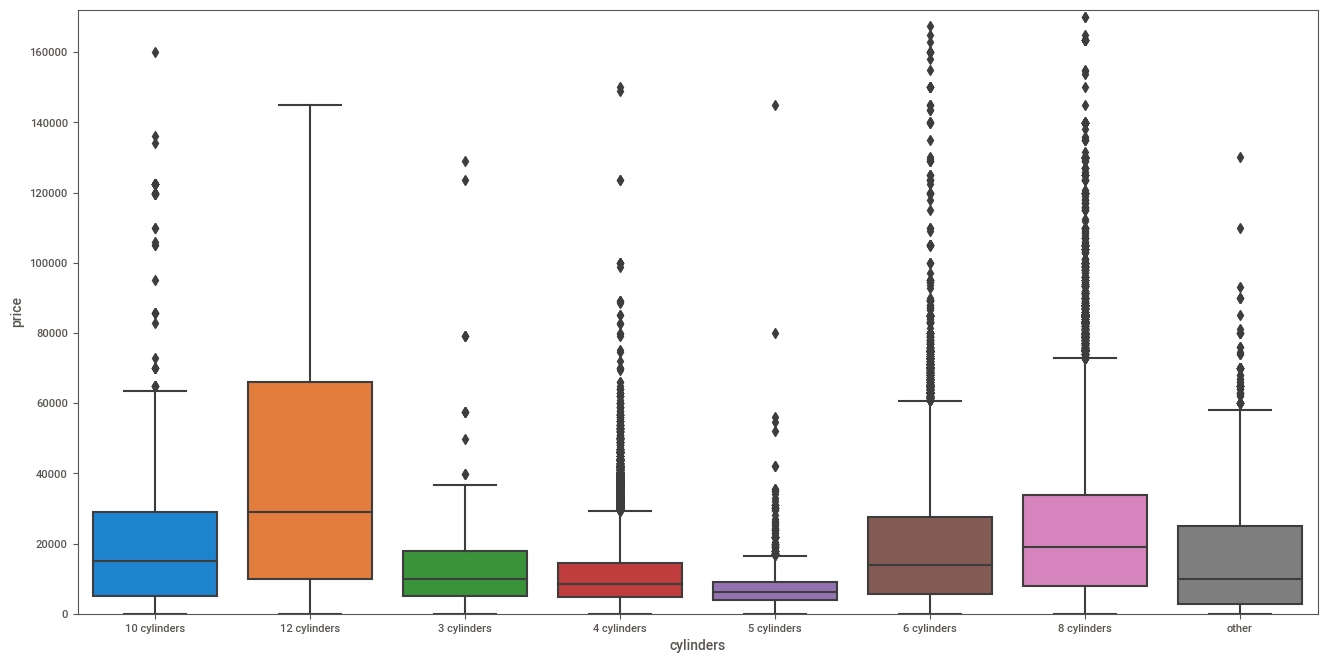

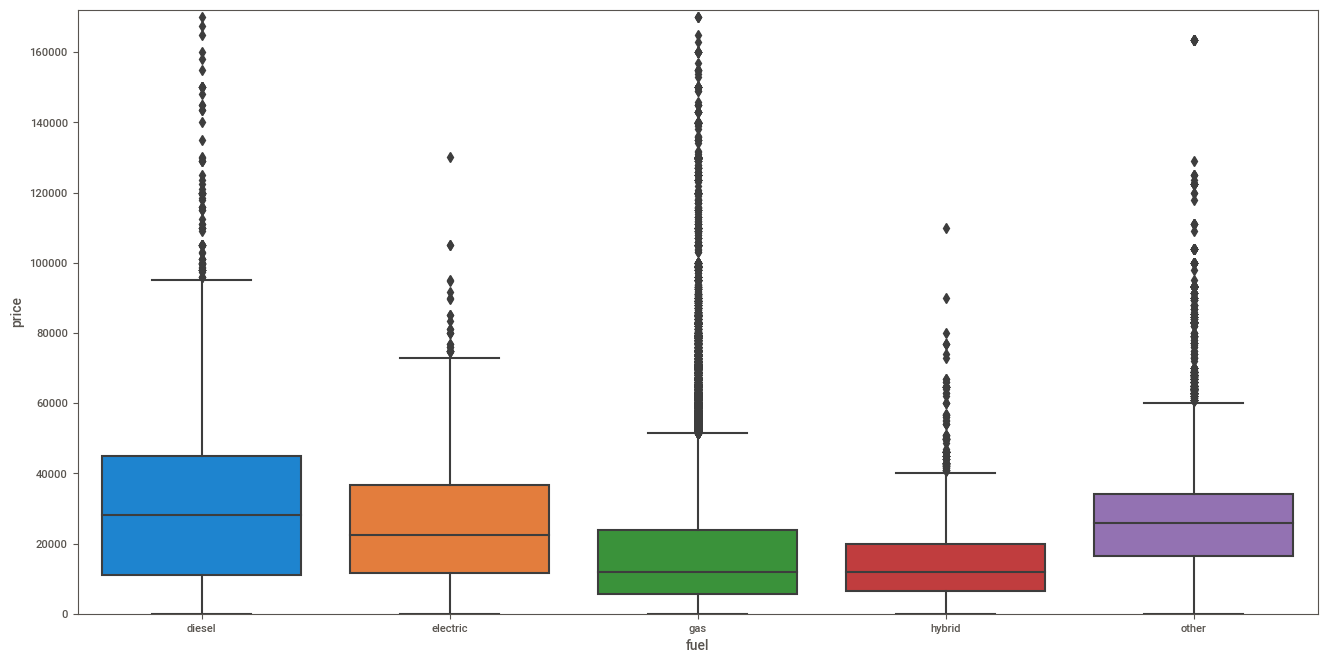

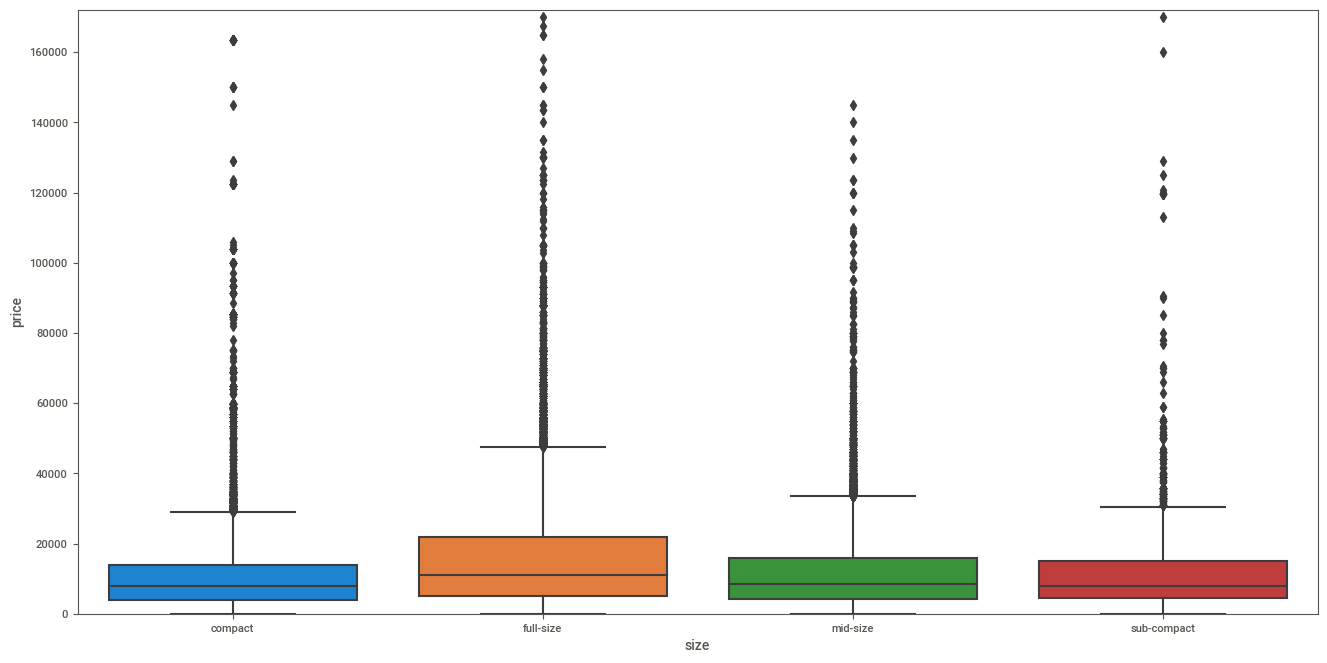

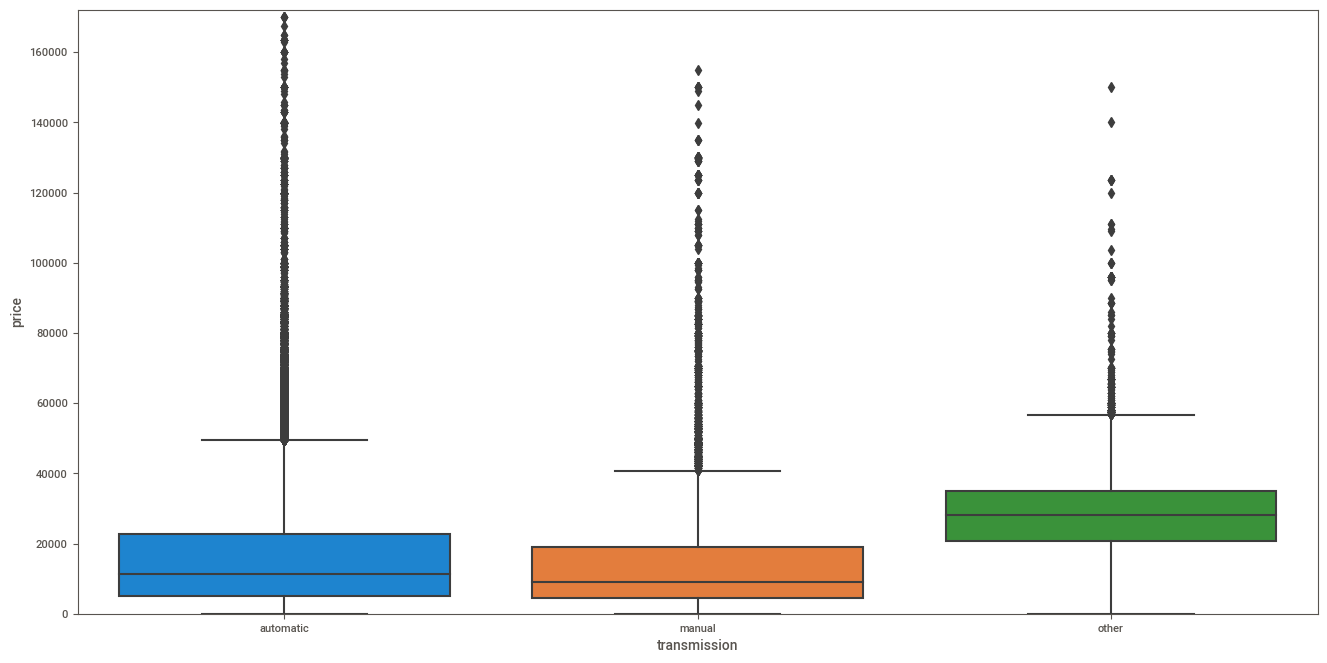

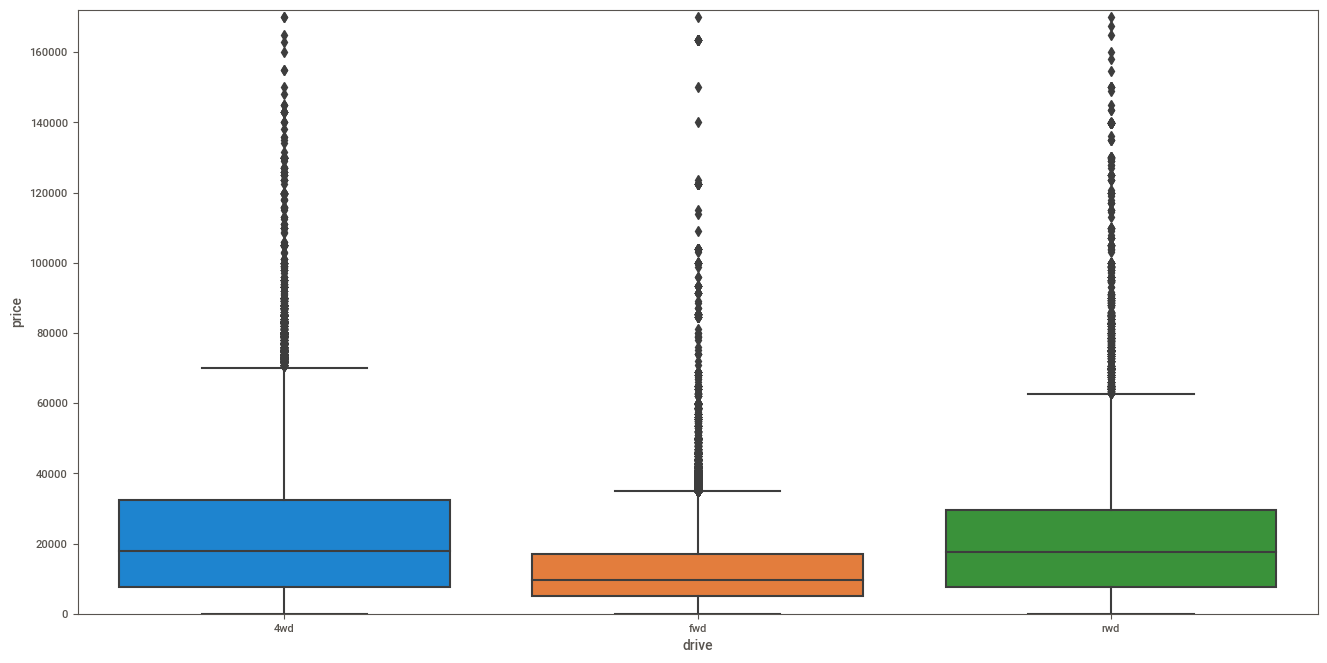

In [19]:
variable_list = ["condition", "cylinders", "fuel", "size", "transmission", "drive"]
for i in range(len(variable_list)):
    box_plot_generation(carData, variable_list[i])

## Dropping Variables

For a multitude of reasons, several variables will have to be dropped. This section aims to justify why we have dropped several variables.

By doing a correlation matrix of the listings of several manufacturers, one can see that the latitude and longitude of the car listings have almost no correlation with price whatsoever. We have thus decided to drop it.

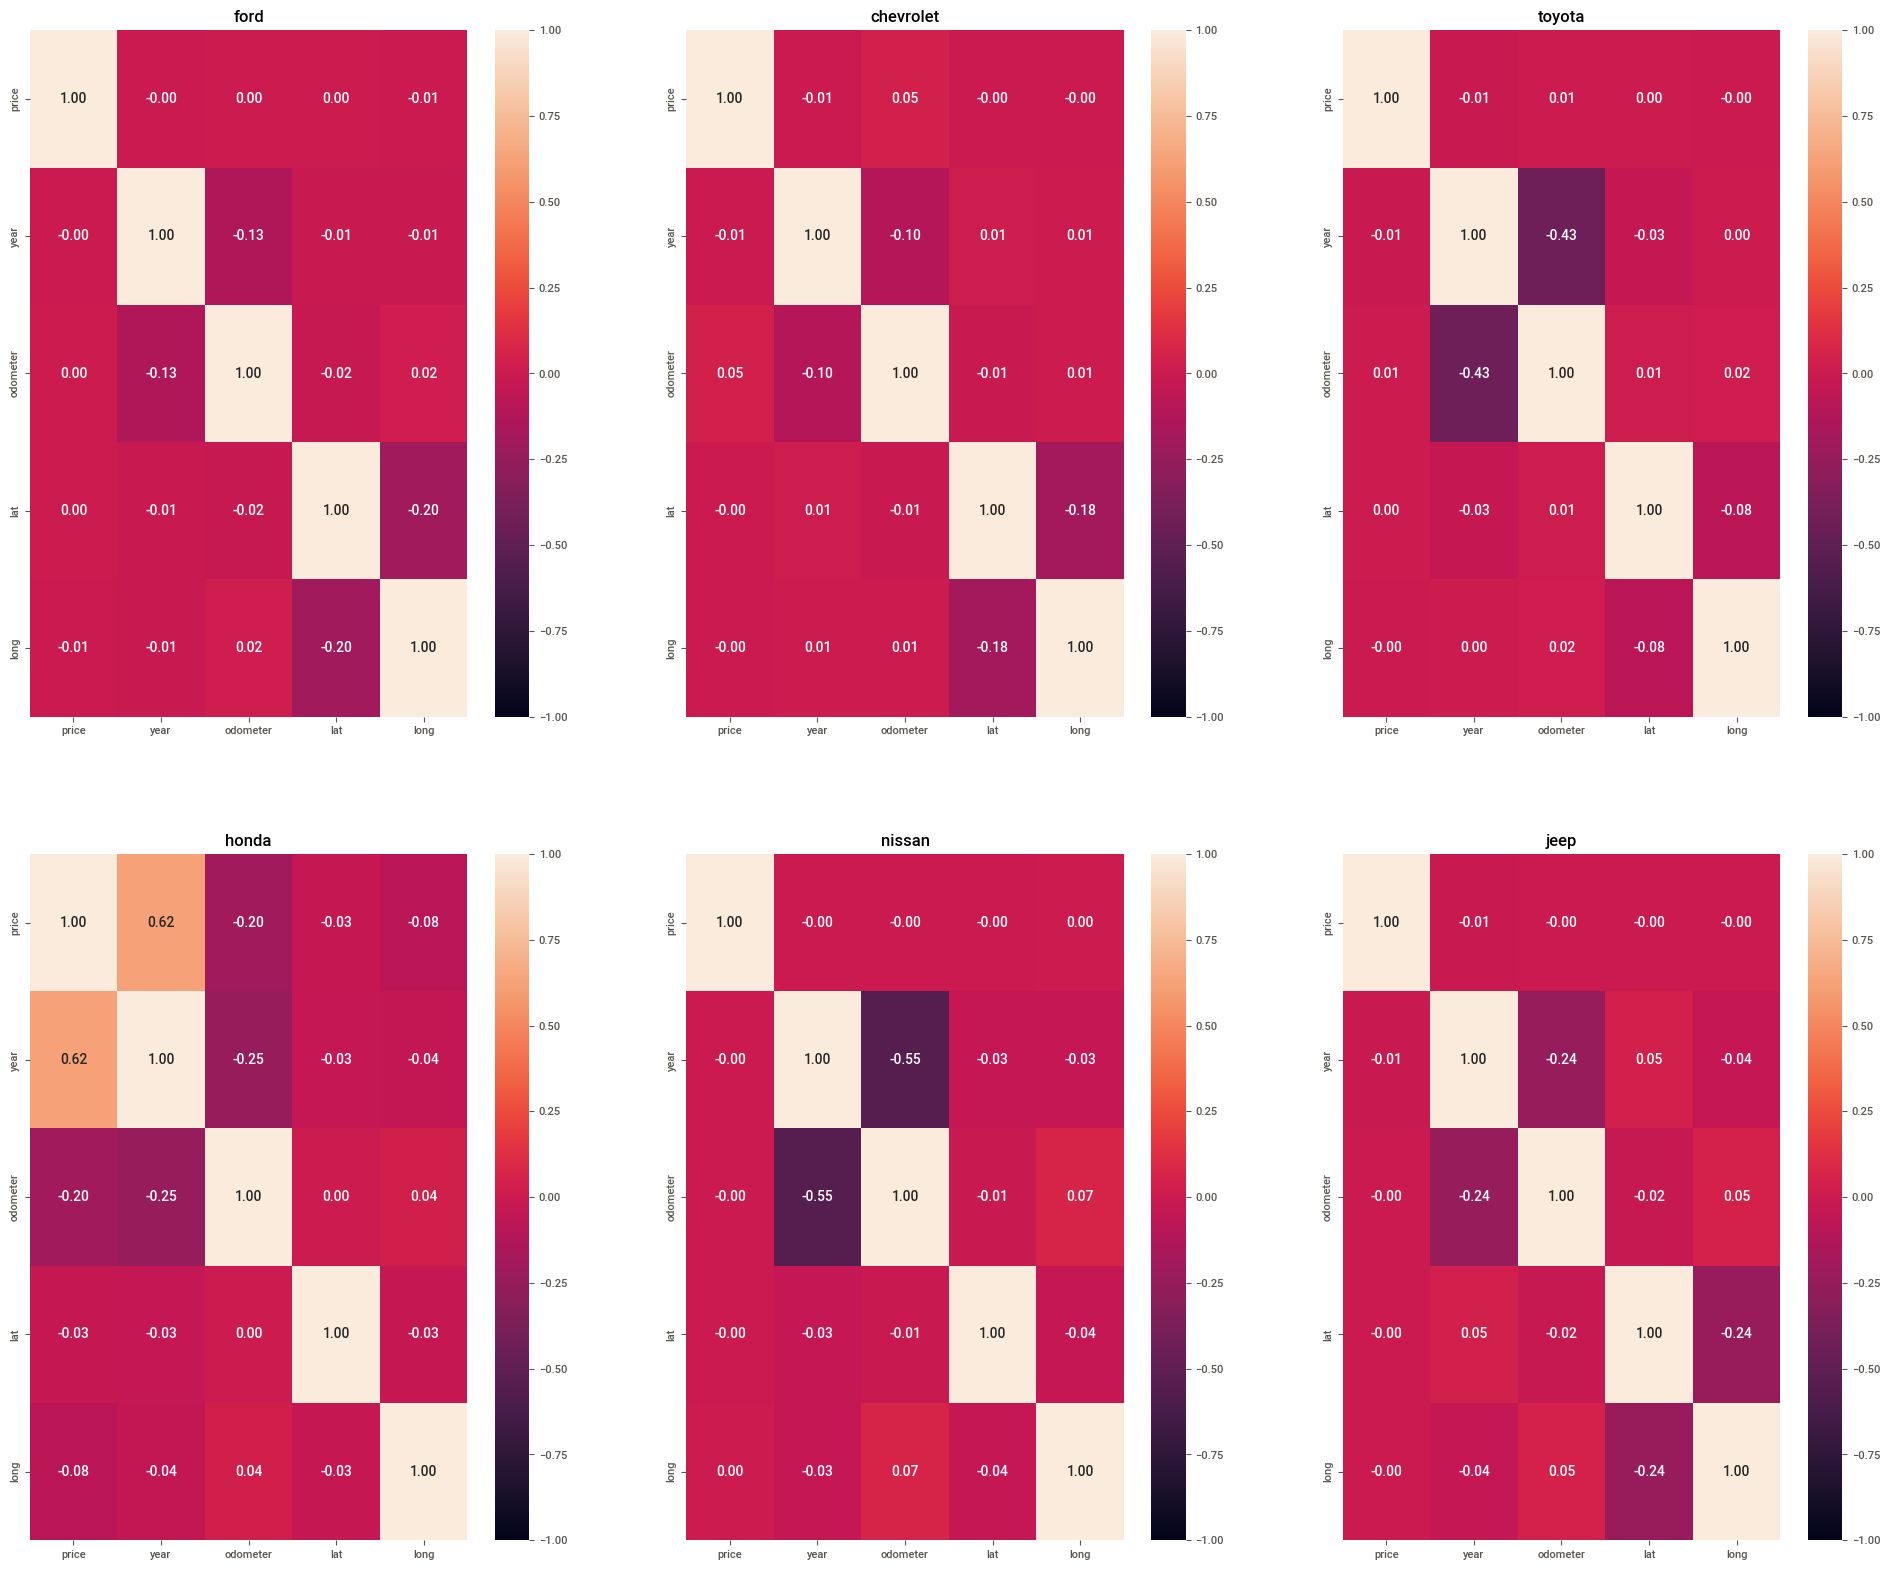

In [20]:
manufacturer_list = ['ford', 'chevrolet', 'toyota', 'honda', 'nissan', 'jeep']
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(24,20))
counter = 0
for i in range(len(manufacturer_list)):
    x = manufacturer_list[i]
    y = carData[carData['manufacturer'] == x]
    numeric_cols = [column for column in y.columns if y[column].dtype != 'object']
    y = y[numeric_cols]
    sb.heatmap(y.corr(), vmin=-1, vmax=1, annot=True,fmt=".2f", ax=ax[counter][i%3])
    ax[counter][i%3].title.set_text(x)
    if i == 2:
        counter += 1

We have also decided to drop cylinders. This is because a significant portion of the dataset contains "other", which is hard to replace, as there exist electric car listings which do not have cylinders, as well as normal cars which have more than 12 cylinders. We cannot just lump normal cars with electric cars as this will distort the data.

In [21]:
carData["cylinders"].value_counts()

6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64

The same can be said for car type. Unfortunately, a large portion of the values are "other", and there is no easy way to clean this data up without making sweeping generalizations or manually checking each model. 

In [22]:
carData["type"].value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

There are simply too many models to do anything useful with it. 

In [23]:
len(carData["model"].value_counts())

29667

It is hard to carry out any meaningful analysis on the paint_color with such general colors given. 

In [24]:
carData["paint_color"].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

# End of EDA
This marks the end of this notebook.

To conlude, we did

- Feature exploration with this notebook
- Justified why we wanted to drop some variables
- Justified why certain variables are worth exploring

Learning points

- using python packages such as sweetviz to generate reports
- variety of ways we can display and analyse the same information

In the next notebook we will perform data cleaning with the results and insights we have gotten